## Final Project Submission

Please fill out:
* Student name: **Chelsea Power**
* Student pace: **part time**
* Scheduled project review date/time: **March 7, 2019 at 11 am ET**
* Instructor name: **Joe San Pietro**
* Blog post URL: **TBD**


## Phase 1: Understanding the Dataset

* Explore the housing sale prices in King County, USA between the time period May 2014 - May 2015. 
* Identify most important features and explore the intercorrelation between features. 

In [1]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('kc_house_data.csv')

#Look at size of the dataset
df.shape

(21597, 21)

In [2]:
#Show first ten rows in DataFrame
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


### Initial Variables

* id - Unique ID for each home sold 
* date - Date of the home sale 
* price - Price of each home sold 
* bedrooms - Number of bedrooms 
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 
* sqft_living - Square footage of the apartments interior living space 
* sqft_lot - Square footage of the land space 
* floors - Number of floors 
* waterfront - For whether the apartment was overlooking the waterfront or not 1’s represent a waterfront property, 0’s represent a non-waterfront property 
* view - An index from 0 to 4 of how good the view of the property was, 0 - lowest, 4 - highest 
* condition - An index from 1 to 5 on the condition of the apartment, 1 - lowest, 4 - highest 
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of * construction and design, and 11-13 have a high quality level of construction and design. 
* sqft_above - The square footage of the interior housing space that is above ground level 
* sqft_basement - The square footage of the interior housing space that is below ground level 
* yr_built - The year the house was initially built 
* yr_renovated - The year of the house’s last renovation 
* zipcode - What zipcode area the house is in 
* lat - Lattitude 
* long - Longitude 
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Phase 2: Scrubbing (Data Preparation)
* Detecting and dealing with missing values
* Data type conversions (e.g. numeric data mistakenly encoded as strings)
* Checking for and removing multicollinearity (correlated predictors)

In [3]:
# Checking the column types and entries per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# Show total missing values by column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# Show unique values for waterfront column
df['waterfront'].unique()

array([nan,  0.,  1.])

In [6]:
# Replace null values with 0 rather than removing 2376 rows
# Waterfront is a category variable where 0 = no view and 1 = view
df['waterfront'].fillna(0, inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# Show unique values for view column
df["view"].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [8]:
# Replace 63 null values with 0 to be equilivant to no view to onvert variable from a float to an int
# View is a categorical value
df['view'].fillna(0, inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
# Show unique values for yr_renovated column
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [10]:
# Replace null values with 0 so I can convert yr_renovated from a float to an int
df['yr_renovated'].fillna(0, inplace=True)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Change types of the variables below:

In [11]:
# Convert from object to datetime
df['date'] = df['date'].astype('datetime64[ns]')

# Convert from object to int64
df['yr_renovated'] = df['yr_renovated'].astype('int64')

# Make categorical variables
df["waterfront"] = df["waterfront"].astype('category')
df["condition"] = df["condition"].astype('category')
df["view"] = df["view"].astype('category')
df["grade"] = df["grade"].astype('category')

# Convert sqft_basement from object to float
df['sqft_basement'] = df['sqft_basement'].convert_objects(convert_numeric=True)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [12]:
# For loop to determine if there are any remaining null values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        print(column)

sqft_basement


In [13]:
# Since sqft_basement was converted from a string to an int, there are 454 null values
# Replace null values with 0
df['sqft_basement'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null category
view             21597 non-null category
condition        21597 non-null category
grade            21597 non-null category
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(4), datetime64[ns](1), float64(6), int64(10

## Summary

* All columns have missing values removed and have been set to the correct type
* Will not be considering the means and std values for categorical (`waterfront`, `view`, `condition` and `grade`) and datetime (`date`) variables
* Will not be considering the means and std values for `id`, `zipcode`, `lat`, `long` columns

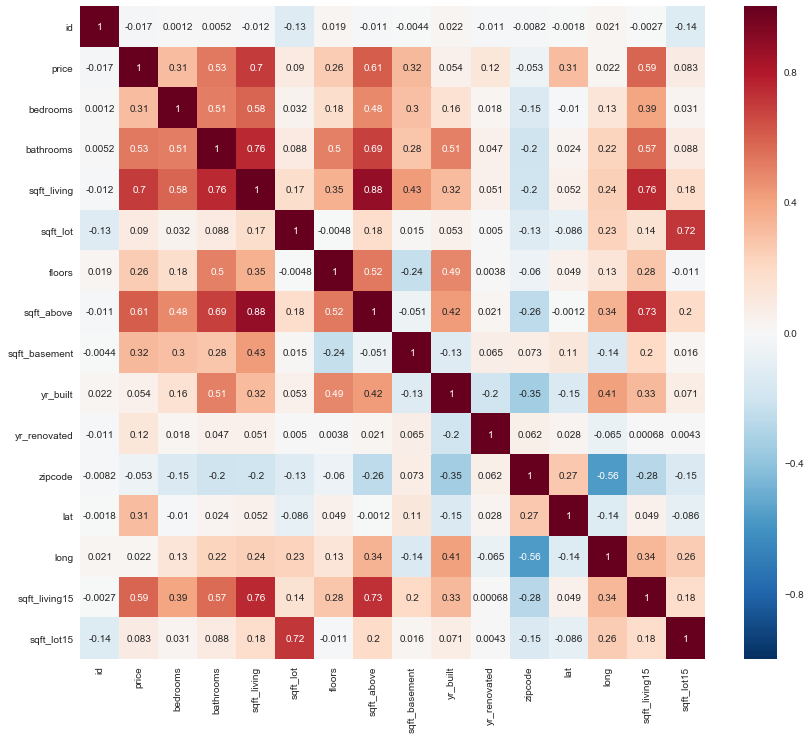

In [14]:
#Create coorelation heatmap
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

## Heatmap Summary

* Multicolinarity is high for: `sqft_living`, `sqft_above`, and `sqft_living15`. These are good candidates to be removed.
* `ID` should be removed.

In [15]:
# Remove ID
df_pred = df.drop(['id'], axis=1)

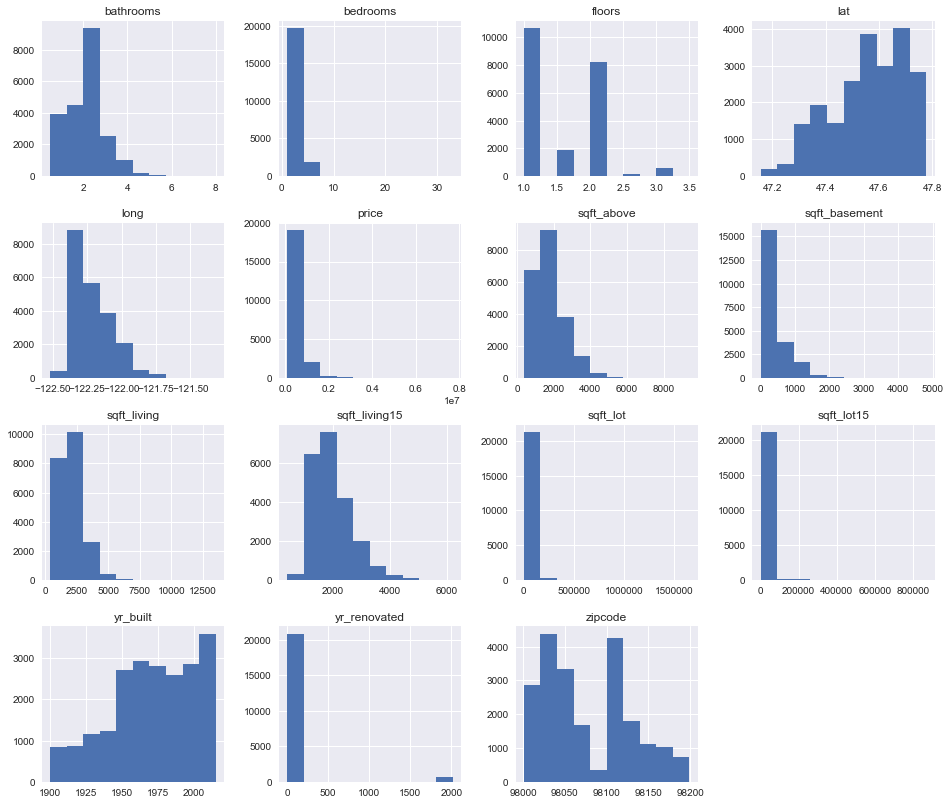

In [16]:
# Look at histograms for all columns
df_pred.hist(figsize = [16, 14]);

### Summary

* There are some obvious outliers in `bedrooms`, `bathrooms`, `sqft_basement`, `sqft_lot`, and `sqft_lot15` columns 
* The data needs extra preprocessing / cleaning

In [17]:
# Filter data to remove outliers
filtered_df = df[(df_pred["bedrooms"] <= 5) & (df_pred["bathrooms"] > 0) & 
                 (df_pred["bathrooms"] <= 4) & (df_pred["sqft_basement"] <= 1000) 
                 & (df_pred["sqft_lot"] <= 250000) & (df_pred["sqft_lot15"] <= 200000)]

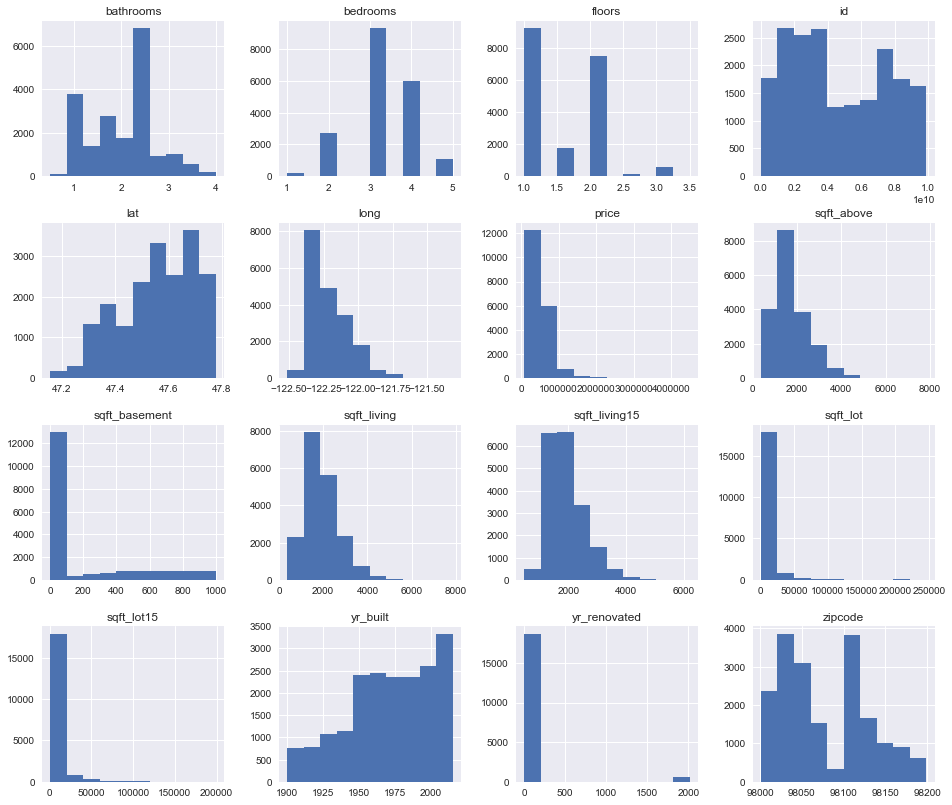

In [18]:
# Histogram showing the filtered variables
filtered_df.hist(figsize = [16, 14]);

## Phase 3: Exploring

* Normailze data/variables

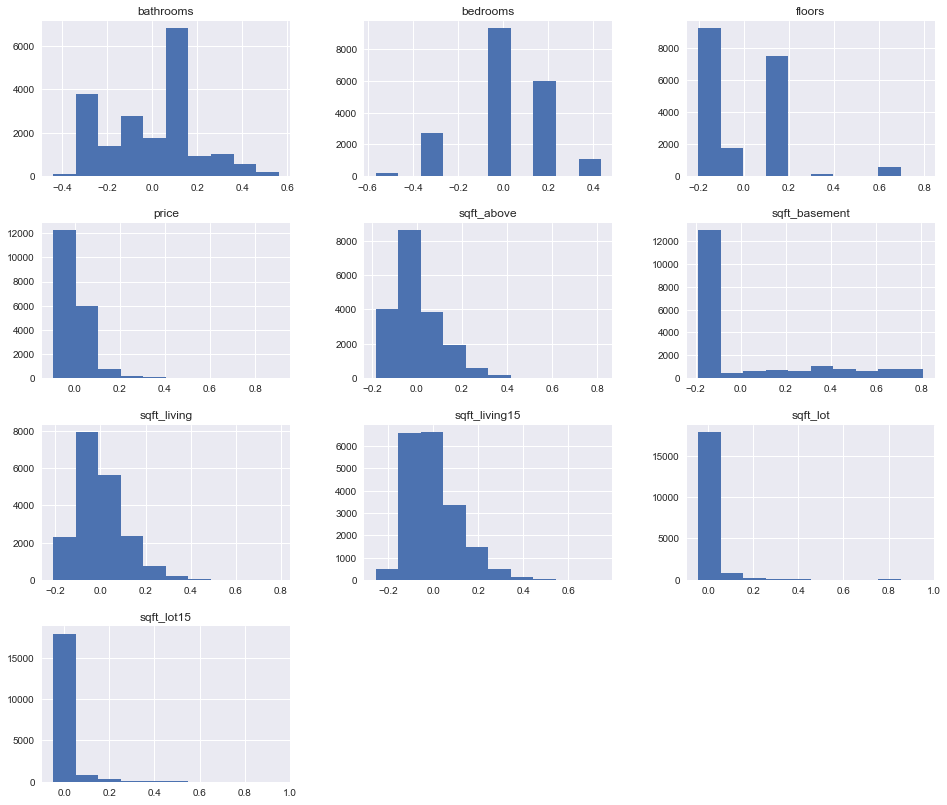

In [19]:
# Mix/Max Scaling
bedrooms = filtered_df["bedrooms"]
bathrooms = filtered_df["bathrooms"]
floors = filtered_df["floors"]
price = filtered_df["price"]
sqft_above = filtered_df["sqft_above"]
sqft_basement = filtered_df["sqft_basement"]
sqft_living = filtered_df["sqft_living"]
sqft_living15 = filtered_df["sqft_living15"]
sqft_lot = filtered_df["sqft_lot"]
sqft_lot15 = filtered_df["sqft_lot15"]

scaled_bedrooms = (bedrooms-np.mean(bedrooms))/(max(bedrooms)-min(bedrooms))
scaled_bathrooms = (bathrooms-np.mean(bathrooms))/(max(bathrooms)-min(bathrooms))
scaled_floors = (floors-np.mean(floors))/(max(floors)-min(floors))
scaled_price = (price-np.mean(price))/(max(price)-min(price))
scaled_sqft_above = (sqft_above-np.mean(sqft_above))/(max(sqft_above)-min(sqft_above))
scaled_sqft_basement = (sqft_basement-np.mean(sqft_basement))/(max(sqft_basement)-min(sqft_basement))
scaled_sqft_living = (sqft_living-np.mean(sqft_living))/(max(sqft_living)-min(sqft_living))
scaled_sqft_living15 = (sqft_living15-np.mean(sqft_living15))/(max(sqft_living15)-min(sqft_living15))
scaled_sqft_lot = (sqft_lot-np.mean(sqft_lot))/(max(sqft_lot)-min(sqft_lot))
scaled_sqft_lot15 = (sqft_lot15-np.mean(sqft_lot15))/(max(sqft_lot15)-min(sqft_lot15))

df_scaled = pd.DataFrame([])
df_scaled["bedrooms"] = scaled_bedrooms
df_scaled["bathrooms"] = scaled_bathrooms
df_scaled["floors"] = scaled_floors
df_scaled["price"] = scaled_price
df_scaled["sqft_above"] = scaled_sqft_above
df_scaled["sqft_basement"] = scaled_sqft_basement
df_scaled["sqft_living"] = scaled_sqft_living
df_scaled["sqft_living15"] = scaled_sqft_living15
df_scaled["sqft_lot"] = scaled_sqft_lot
df_scaled["sqft_lot15"] = scaled_sqft_lot15

df_scaled.hist(figsize  = [16, 14]);

## Phase 4: Modeling

* Compare continuous features to categorical
* Get R-squared & P value
* Create OLS Model
* Conduct recrussive feature elimination

In [20]:
# Ordinary Least Squares
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Runs OLS regression between (continuous) independent and dependent variables
col_names = df_scaled.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("")
    print ("King County Houses: Price~" + val)
    print ("------------------------------")
    f = 'price~' + val
    model = smf.ols(formula=f, data=df_scaled).fit()
    X_new = pd.DataFrame({val: [df_scaled[val].min(), df_scaled[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


King County Houses: Price~bedrooms
------------------------------
['bedrooms', 0.08699824464539219, 6.288372600415926e-18, 0.09568954791297293, 0.0]

King County Houses: Price~bathrooms
------------------------------
['bathrooms', 0.2135042881701429, 6.288372600415926e-18, 0.15027236061393429, 0.0]

King County Houses: Price~floors
------------------------------
['floors', 0.08905656796059658, 6.288372600415926e-18, 0.0894541445450044, 0.0]

King County Houses: Price~sqft_above
------------------------------
['sqft_above', 0.35010548725032964, 6.288372600415926e-18, 0.370443002069206, 0.0]

King County Houses: Price~sqft_basement
------------------------------
['sqft_basement', 0.019254419052669225, 6.288372600415926e-18, 0.02952478115359905, 1.9746059889442962e-83]

King County Houses: Price~sqft_living
------------------------------
['sqft_living', 0.42702932828459583, 6.288372600415926e-18, 0.4113699727521151, 0.0]

King County Houses: Price~sqft_living15
--------------------------

In [21]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0869982,6.28837e-18,0.0956895,0
2,bathrooms,0.213504,6.28837e-18,0.150272,0
3,floors,0.0890566,6.28837e-18,0.0894541,0
4,sqft_above,0.350105,6.28837e-18,0.370443,0
5,sqft_basement,0.0192544,6.28837e-18,0.0295248,1.97461e-83
6,sqft_living,0.427029,6.28837e-18,0.41137,0
7,sqft_living15,0.33332,6.28837e-18,0.335397,0
8,sqft_lot,0.0124889,6.28837e-18,0.0894281,1.39124e-54
9,sqft_lot15,0.0116299,6.28837e-18,0.093256,6.24545e-51


### Results

* `bathrooms`,  `sqft_above`, `sqft_living` and `sqft_living15` should be removed
* After removing these variables, run OLS again

In [22]:
df_scaled2 = df_scaled.drop(['bathrooms', 'sqft_above', 'sqft_living', 'sqft_living15'], axis=1)
df_scaled2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19264 entries, 0 to 21596
Data columns (total 6 columns):
bedrooms         19264 non-null float64
floors           19264 non-null float64
price            19264 non-null float64
sqft_basement    19264 non-null float64
sqft_lot         19264 non-null float64
sqft_lot15       19264 non-null float64
dtypes: float64(6)
memory usage: 1.0 MB


In [23]:
# Run OLS a second time
col_names = df_scaled2.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("")
    print ("King County Houses: Price~" + val)
    print ("------------------------------")
    f = 'price~' + val
    model = smf.ols(formula=f, data=df_scaled2).fit()
    X_new = pd.DataFrame({val: [df_scaled2[val].min(), df_scaled2[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


King County Houses: Price~bedrooms
------------------------------
['bedrooms', 0.08699824464539219, 6.288372600415926e-18, 0.09568954791297293, 0.0]

King County Houses: Price~floors
------------------------------
['floors', 0.08905656796059658, 6.288372600415926e-18, 0.0894541445450044, 0.0]

King County Houses: Price~sqft_basement
------------------------------
['sqft_basement', 0.019254419052669225, 6.288372600415926e-18, 0.02952478115359905, 1.9746059889442962e-83]

King County Houses: Price~sqft_lot
------------------------------
['sqft_lot', 0.012488904949810808, 6.288372600415926e-18, 0.08942810679041205, 1.3912420752403755e-54]

King County Houses: Price~sqft_lot15
------------------------------
['sqft_lot15', 0.011629898161827468, 6.288372600415926e-18, 0.09325596015462535, 6.245448768182093e-51]


In [24]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0869982,6.28837e-18,0.0956895,0
2,floors,0.0890566,6.28837e-18,0.0894541,0
3,sqft_basement,0.0192544,6.28837e-18,0.0295248,1.97461e-83
4,sqft_lot,0.0124889,6.28837e-18,0.0894281,1.39124e-54
5,sqft_lot15,0.0116299,6.28837e-18,0.093256,6.24545e-51


### Results

* `bedrooms` and `floors` should be removed
* After removing these variables, run OLS again

In [25]:
df_scaled3 = df_scaled2.drop(['bedrooms', 'floors'], axis=1)
df_scaled3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19264 entries, 0 to 21596
Data columns (total 4 columns):
price            19264 non-null float64
sqft_basement    19264 non-null float64
sqft_lot         19264 non-null float64
sqft_lot15       19264 non-null float64
dtypes: float64(4)
memory usage: 752.5 KB


In [26]:
# Run OLS a third time
col_names = df_scaled3.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("")
    print ("King County Houses: Price~" + val)
    print ("------------------------------")
    f = 'price~' + val
    model = smf.ols(formula=f, data=df_scaled3).fit()
    X_new = pd.DataFrame({val: [df_scaled3[val].min(), df_scaled3[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


King County Houses: Price~sqft_basement
------------------------------
['sqft_basement', 0.019254419052669225, 6.288372600415926e-18, 0.02952478115359905, 1.9746059889442962e-83]

King County Houses: Price~sqft_lot
------------------------------
['sqft_lot', 0.012488904949810808, 6.288372600415926e-18, 0.08942810679041205, 1.3912420752403755e-54]

King County Houses: Price~sqft_lot15
------------------------------
['sqft_lot15', 0.011629898161827468, 6.288372600415926e-18, 0.09325596015462535, 6.245448768182093e-51]


In [27]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_basement,0.0192544,6.28837e-18,0.0295248,1.97461e-83
2,sqft_lot,0.0124889,6.28837e-18,0.0894281,1.39124e-54
3,sqft_lot15,0.0116299,6.28837e-18,0.093256,6.24545e-51


### Build a model with each categorical variable as a predictor

* Create a new dataset with One Hot Encode categories
* Run against min/max scaled and regular `price`
* Use the 4 categorical variables: `waterfront`, `view`, `condition`, and `grade`

In [28]:
# Create new data set with only price and the category variables
df_categories = df_pred.drop(['date','bedrooms','bathrooms','sqft_living',
                                 'sqft_lot','floors','sqft_above','sqft_basement',
                                 'yr_built', 'yr_renovated','zipcode','lat', 'long',
                             'sqft_living15', 'sqft_lot15'], axis=1)

In [29]:
# One Hot Encode the category data set
one_hot_df = pd.get_dummies(df_categories)
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
price             21597 non-null float64
waterfront_0.0    21597 non-null uint8
waterfront_1.0    21597 non-null uint8
view_0.0          21597 non-null uint8
view_1.0          21597 non-null uint8
view_2.0          21597 non-null uint8
view_3.0          21597 non-null uint8
view_4.0          21597 non-null uint8
condition_1       21597 non-null uint8
condition_2       21597 non-null uint8
condition_3       21597 non-null uint8
condition_4       21597 non-null uint8
condition_5       21597 non-null uint8
grade_3           21597 non-null uint8
grade_4           21597 non-null uint8
grade_5           21597 non-null uint8
grade_6           21597 non-null uint8
grade_7           21597 non-null uint8
grade_8           21597 non-null uint8
grade_9           21597 non-null uint8
grade_10          21597 non-null uint8
grade_11          21597 non-null uint8
grade_12          21597 non-nul

In [30]:
# Mix Max Scaled Price
cols_waterfront = one_hot_df.columns[2:3]
cols_view = one_hot_df.columns[4:8]
cols_condition = one_hot_df.columns[9:13]
cols_grade = one_hot_df.columns[14:24] 

cols = [cols_waterfront, cols_view, cols_condition, cols_grade]
for col in cols:
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data=df_scaled).fit()
    print(model.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

In [31]:
# Regular price
cols_waterfront= one_hot_df.columns[2:3]
cols_view = one_hot_df.columns[4:8]
cols_condition = one_hot_df.columns[9:13]
cols_grade = one_hot_df.columns[14:24] 

cols = [cols_waterfront, cols_view, cols_condition, cols_grade]
for col in cols:
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data=df_pred).fit()
    print(model.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

## Phase 5: Interpert
* Conclude the results
* Evaluate the meaning of the results